In [1]:
### BIO index clustering - python-only pipeline



In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [3]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
from salishsea_tools import (
viz_tools)


#### 

In [4]:
cl_2013 = pickle.load(open('./pkls/bio_clustmat_2013.pkl', 'rb'))
cl_2014 = pickle.load(open('./pkls/bio_clustmat_2014.pkl', 'rb'))
cl_2015 = pickle.load(open('./pkls/bio_clustmat_2015.pkl', 'rb'))
cl_2016 = pickle.load(open('./pkls/bio_clustmat_2016.pkl', 'rb'))
sig_2013 = pickle.load(open('./pkls/bio_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/bio_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/bio_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/bio_datamat_2016.pkl', 'rb'))

cldes_2013_reass = pickle.load(open('./pkls/BIO_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass = pickle.load(open('./pkls/BIO_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass = pickle.load(open('./pkls/BIO_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass = pickle.load(open('./pkls/BIO_clno_5_2016_reass.pkl', 'rb'))


## visualize original clusterings by size and do manual relabeling

In [5]:


var = 'bio'
year = 2013
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2013_reass = np.zeros_like(cl_this)
cldes_2013_reass[cl_this == 1] = 5
cldes_2013_reass[cl_this == 2] = 2
cldes_2013_reass[cl_this == 3] = 3
cldes_2013_reass[cl_this == 4] = 1
cldes_2013_reass[cl_this == 5] = 4

year = 2014
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2014_reass = np.zeros_like(cl_this)
cldes_2014_reass[cl_this == 1] = 5
cldes_2014_reass[cl_this == 2] = 1
cldes_2014_reass[cl_this == 3] = 3
cldes_2014_reass[cl_this == 4] = 2
cldes_2014_reass[cl_this == 5] = 4

year = 2015
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2015_reass = np.zeros_like(cl_this)
cldes_2015_reass[cl_this == 1] = 1
cldes_2015_reass[cl_this == 2] = 2
cldes_2015_reass[cl_this == 3] = 3
cldes_2015_reass[cl_this == 4] = 4
cldes_2015_reass[cl_this == 5] = 5

year = 2016
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2016_reass = np.zeros_like(cl_this)
cldes_2016_reass[cl_this == 1] = 5
cldes_2016_reass[cl_this == 2] = 1
cldes_2016_reass[cl_this == 3] = 3
cldes_2016_reass[cl_this == 4] = 4
cldes_2016_reass[cl_this == 5] = 2





## chceck that reassigning worked

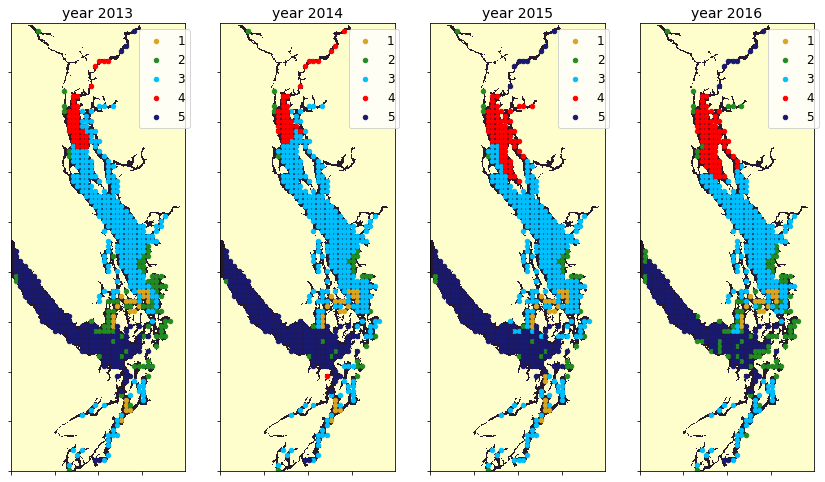

In [6]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']
    
reload(vp)
fact = 0.8
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters_basic(axs[0],'2013','bio',5,cldes_2013_reass, colors)
vp.clusters_basic(axs[1],'2014','bio',5,cldes_2014_reass, colors)
vp.clusters_basic(axs[2],'2015','bio',5,cldes_2015_reass, colors)
vp.clusters_basic(axs[3],'2016','bio',5,cldes_2016_reass, colors)

In [7]:
from scipy.signal import find_peaks
diat_sig_2013 = sig_2013[:,0:365]
bloomtim_2013 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2013[i,:]
    thres = 0.5*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim_2013[i] = day1

from scipy.signal import find_peaks
diat_sig_2014 = sig_2014[:,0:365]
bloomtim_2014 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2014[i,:]
    thres = 0.5*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim_2014[i] = day1

from scipy.signal import find_peaks
diat_sig_2015 = sig_2015[:,0:365]
bloomtim_2015 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2015[i,:]
    thres = 0.5*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim_2015[i] = day1

from scipy.signal import find_peaks
diat_sig_2016 = sig_2016[:,0:365]
bloomtim_2016 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2016[i,:]
    thres = 0.5*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim_2016[i] = day1

In [8]:
from scipy.signal import find_peaks
diat_sig_2013 = sig_2013[:,0:365]
bloomtim0pt3_2013 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2013[i,:]
    thres = 0.3*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim0pt3_2013[i] = day1

from scipy.signal import find_peaks
diat_sig_2014 = sig_2014[:,0:365]
bloomtim0pt3_2014 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2014[i,:]
    thres = 0.3*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim0pt3_2014[i] = day1

from scipy.signal import find_peaks
diat_sig_2015 = sig_2015[:,0:365]
bloomtim0pt3_2015 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2015[i,:]
    thres = 0.3*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim0pt3_2015[i] = day1

from scipy.signal import find_peaks
diat_sig_2016 = sig_2016[:,0:365]
bloomtim0pt3_2016 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2016[i,:]
    thres = 0.3*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim0pt3_2016[i] = day1

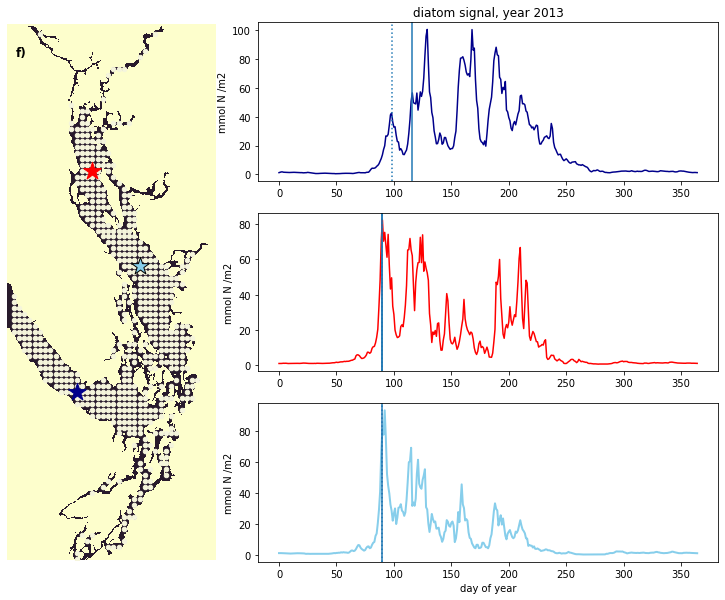

In [9]:
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:]) 

stn_x, stn_y = mf.make_stns(10)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

d_stn_xar = np.array(d_stn_x)
d_stn_yar = np.array(d_stn_y)

### edgelord things

edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
np.squeeze(edge)
np.shape(edge)
edgear = np.array(edge)
edgear = edgear[0]

d_stn_xar_noedge =np.delete(d_stn_xar,edge)
d_stn_yar_noedge = np.delete(d_stn_yar,edge)

fact = 1.4
fig = plt.figure(figsize=(9.1*fact, 7.09*fact))
ax = plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=3)
ax.text(0.04,.94,'f)', fontsize = 12, weight = 'bold', transform=ax.transAxes)
viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)
pts = ax.scatter(d_stn_xar_noedge,d_stn_yar_noedge,\
                 s=20,c='beige',marker='o')
tc = 82
pts = ax.scatter(d_stn_xar_noedge[tc],d_stn_yar_noedge[tc],\
                 s=340 ,c='darkblue', marker='*')
tc = 152
pts = ax.scatter(d_stn_xar_noedge[tc],d_stn_yar_noedge[tc],\
                 s=340 ,c='red', marker='*')
tc = 382
pts = ax.scatter(d_stn_xar_noedge[tc],d_stn_yar_noedge[tc],\
                 s=340 ,c='skyblue', marker='*', edgecolor = 'black')
ax.set_xticklabels( () ) 
ax.set_yticklabels( () ) 
ax.patch.set_visible(False)
ax.axis('off')

i = 82
ax = plt.subplot2grid((3,3), (0,1), colspan=2, rowspan=1)
ax.set_title('diatom signal, year 2013')
ax.set_ylabel('mmol N /m2')
plt.plot(diat_sig_2013[i,:], color = 'darkblue')
ax.axvline(x = bloomtim_2013[i])
ax.axvline(x = bloomtim0pt3_2013[i], linestyle = ':')
i = 152
ax = plt.subplot2grid((3,3), (1,1), colspan=2, rowspan=1)
ax.set_ylabel('mmol N /m2')
ax.axvline(x = bloomtim_2013[i])
plt.plot(diat_sig_2013[i,:], color = 'red')
ax.axvline(x = bloomtim_2013[i])
ax.axvline(x = bloomtim0pt3_2013[i], linestyle = ':')

i = 382
ax = plt.subplot2grid((3,3), (2,1), colspan=2, rowspan=1)
ax.set_ylabel('mmol N /m2')
plt.plot(diat_sig_2013[i,:], color = 'skyblue', linewidth = 2)
ax.set_xlabel('day of year')
ax.set_ylabel('mmol N /m2')

ax.axvline(x = bloomtim_2013[i])
ax.axvline(x = bloomtim0pt3_2013[i], linestyle = ':')
# ax.add_patch(Rectangle([0,0],397,898,\
#                        fill=False, edgecolor='k', zorder=10))

In [10]:
np.shape(bloomtim_2013)

(571,)

In [11]:
# bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
# grid = mf.import_bathy(bath)
# fmask = (grid.fmask[0,0,:,:]) 

# stn_x, stn_y = mf.make_stns(10)
# d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

# d_stn_xar = np.array(d_stn_x)
# d_stn_yar = np.array(d_stn_y)

# edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
# np.squeeze(edge)
# np.shape(edge)
# edgear = np.array(edge)
# edgear = edgear[0]

# d_stn_xar =np.delete(d_stn_xar,edge)
# d_stn_yar = np.delete(d_stn_yar,edge)

Text(0.5, 0.98, 'Bloom timing. Bloom definition: first peak of depth-integrated DIATOM biomass \n that is at least 1/2 of annual maximum')

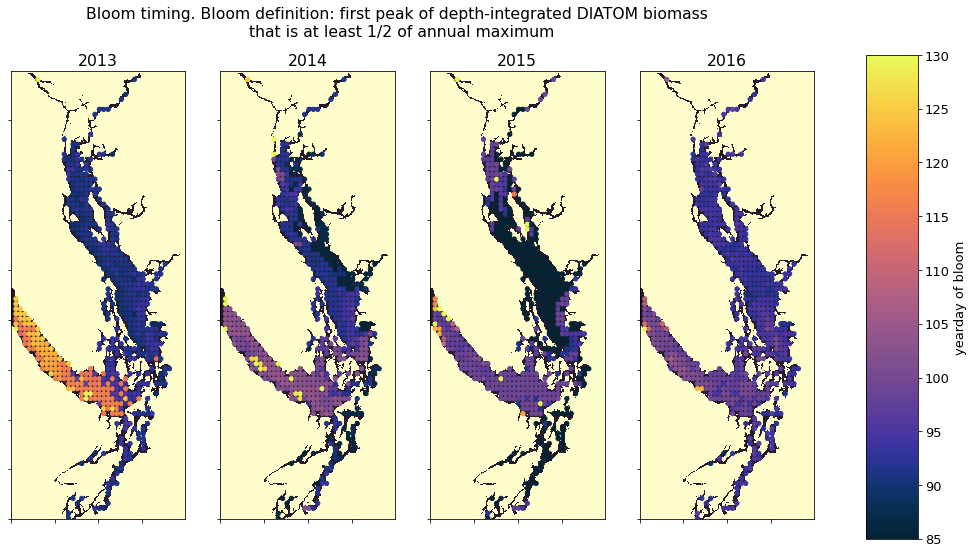

In [12]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}


fact = 1.2
fig = plt.figure(figsize=(12*fact, 7*fact))


bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
# tpkl = f'./pkls/{var}_clustmat_{year}.pkl'
# cl = pickle.load(open(tpkl, 'rb'))

  
fmask = (grid.fmask[0,0,:,:])    


bts = [bloomtim_2013,bloomtim_2014,bloomtim_2015,bloomtim_2016]
tits = ['2013', '2014', '2015', '2016']
for i in range(0,4):
    ax1 = plt.subplot2grid((4,4), (0,i), colspan=1, rowspan=4) 
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)

    ax1.set_ylim([0,898]); ax1.set_xlim([0,398])
    pts = ax1.scatter(d_stn_xar_noedge,d_stn_yar_noedge,s=18,\
                      c=bts[i], vmin = 85, vmax = 130, marker='o',\
                     cmap = cm.cm.thermal)
    viz_tools.set_aspect(ax1) 
    ax1.set_xticklabels( () ) 
    ax1.set_yticklabels( () )
    ax1.set_title(tits[i])

cbar_ax = fig.add_axes([0.95, 0.1, 0.05, 0.8])
fig.colorbar(pts, cax=cbar_ax, label = 'yearday of bloom')
plt.suptitle('Bloom timing. Bloom definition: first peak of depth-integrated DIATOM biomass \n that is at least 1/2 of annual maximum')



# plt.colorbar(pts)

#tit = 'year ' + year # + ' \n n. clusters = '+ str(noclust)

# if legend:
#     ax1.legend(bbox_to_anchor=(1.06, 1), fontsize = legfontsize)
#ax1.set_title(tit,fontsize = legfontsize + 2)

Text(0.5, 0.98, 'Bloom timing. Bloom definition: first peak of depth-integrated DIATOM biomass \n that is at least 30% of annual maximum')

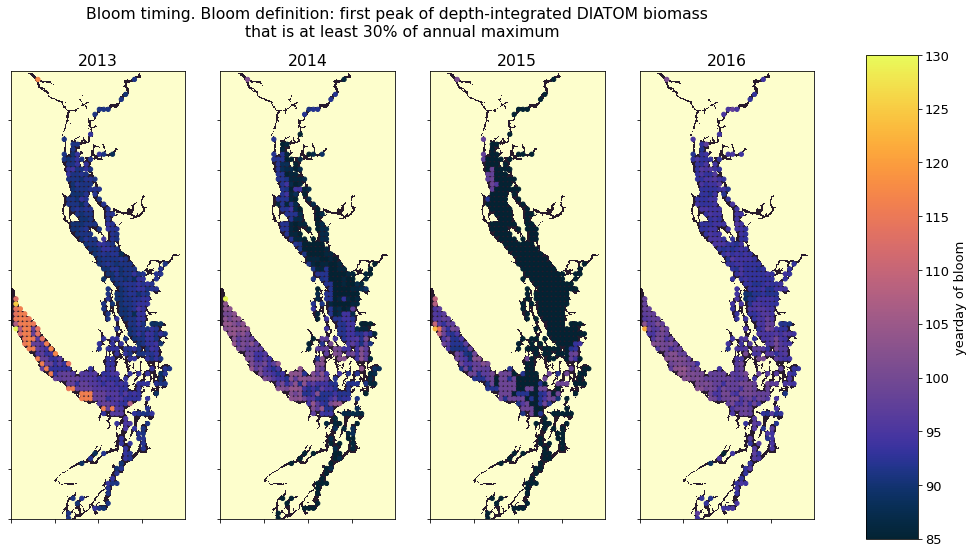

In [13]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}


fact = 1.2
fig = plt.figure(figsize=(12*fact, 7*fact))


bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
# tpkl = f'./pkls/{var}_clustmat_{year}.pkl'
# cl = pickle.load(open(tpkl, 'rb'))

  
fmask = (grid.fmask[0,0,:,:])    


bts = [bloomtim0pt3_2013,bloomtim0pt3_2014,bloomtim0pt3_2015,bloomtim0pt3_2016]
tits = ['2013', '2014', '2015', '2016']
for i in range(0,4):
    ax1 = plt.subplot2grid((4,4), (0,i), colspan=1, rowspan=4) 
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)

    ax1.set_ylim([0,898]); ax1.set_xlim([0,398])
    pts = ax1.scatter(d_stn_xar_noedge,d_stn_yar_noedge,s=18,\
                      c=bts[i], vmin = 85, vmax = 130, marker='o',\
                     cmap = cm.cm.thermal)
    viz_tools.set_aspect(ax1) 
    ax1.set_xticklabels( () ) 
    ax1.set_yticklabels( () )
    ax1.set_title(tits[i])

cbar_ax = fig.add_axes([0.95, 0.1, 0.05, 0.8])
fig.colorbar(pts, cax=cbar_ax, label = 'yearday of bloom')
plt.suptitle('Bloom timing. Bloom definition: first peak of depth-integrated DIATOM biomass \n that is at least 30% of annual maximum')



# plt.colorbar(pts)

#tit = 'year ' + year # + ' \n n. clusters = '+ str(noclust)

# if legend:
#     ax1.legend(bbox_to_anchor=(1.06, 1), fontsize = legfontsize)
#ax1.set_title(tit,fontsize = legfontsize + 2)

In [14]:
from scipy.signal import find_peaks
diat_sig_2013 = sig_2013[:,0:365]
bloomtim0pt3_2013 = np.zeros([571])

tf = 0.3
for i in range(0,571):
    tsig = diat_sig_2013[i,:]
    thres = tf*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim0pt3_2013[i] = day1

from scipy.signal import find_peaks
diat_sig_2014 = sig_2014[:,0:365]
bloomtim0pt3_2014 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2014[i,:]
    thres = tf*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim0pt3_2014[i] = day1

from scipy.signal import find_peaks
diat_sig_2015 = sig_2015[:,0:365]
bloomtim0pt3_2015 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2015[i,:]
    thres = tf*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim0pt3_2015[i] = day1

from scipy.signal import find_peaks
diat_sig_2016 = sig_2016[:,0:365]
bloomtim0pt3_2016 = np.zeros([571])

for i in range(0,571):
    tsig = diat_sig_2016[i,:]
    thres = tf*np.nanmax(tsig)
    q = find_peaks(tsig, height=thres)
    day1 = (q[0][0])
    bloomtim0pt3_2016[i] = day1

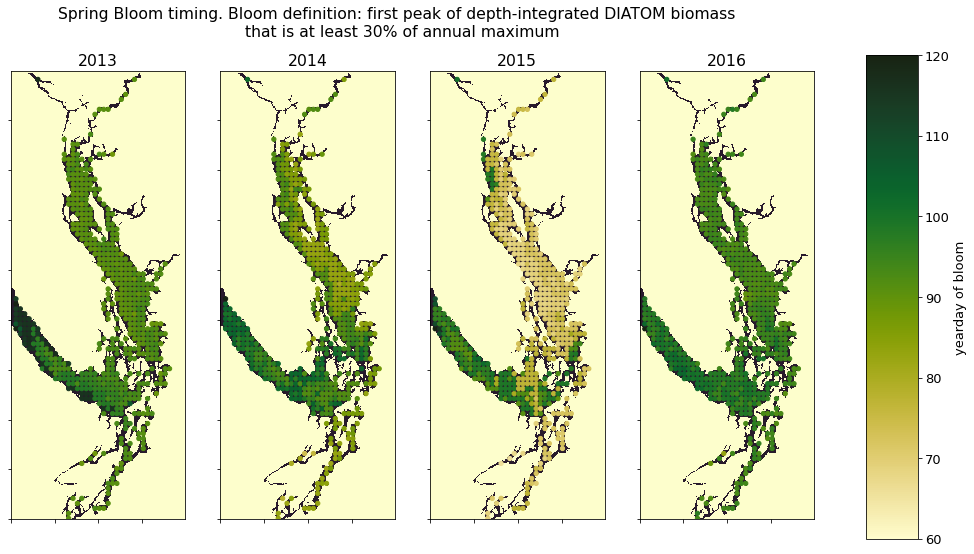

In [15]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}


fact = 1.2
fig = plt.figure(figsize=(12*fact, 7*fact))


bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
# tpkl = f'./pkls/{var}_clustmat_{year}.pkl'
# cl = pickle.load(open(tpkl, 'rb'))

  
fmask = (grid.fmask[0,0,:,:])    


bts = [bloomtim0pt3_2013,bloomtim0pt3_2014,bloomtim0pt3_2015,bloomtim0pt3_2016]
tits = ['2013', '2014', '2015', '2016']
for i in range(0,4):
    ax1 = plt.subplot2grid((4,4), (0,i), colspan=1, rowspan=4) 
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)

    ax1.set_ylim([0,898]); ax1.set_xlim([0,398])
    pts = ax1.scatter(d_stn_xar_noedge,d_stn_yar_noedge,s=18,\
                      c=bts[i], vmin = 60, vmax = 120, marker='o',\
                     cmap = cm.cm.speed)
    viz_tools.set_aspect(ax1) 
    ax1.set_xticklabels( () ) 
    ax1.set_yticklabels( () )
    ax1.set_title(tits[i])

cbar_ax = fig.add_axes([0.95, 0.1, 0.05, 0.8])
fig.colorbar(pts, cax=cbar_ax, label = 'yearday of bloom')
plt.suptitle('Spring Bloom timing. Bloom definition: first peak of depth-integrated DIATOM biomass \n that is at least 30% of annual maximum')

plt.savefig('30pct.jpg')

# plt.colorbar(pts)

#tit = 'year ' + year # + ' \n n. clusters = '+ str(noclust)

# if legend:
#     ax1.legend(bbox_to_anchor=(1.06, 1), fontsize = legfontsize)
#ax1.set_title(tit,fontsize = legfontsize + 2)

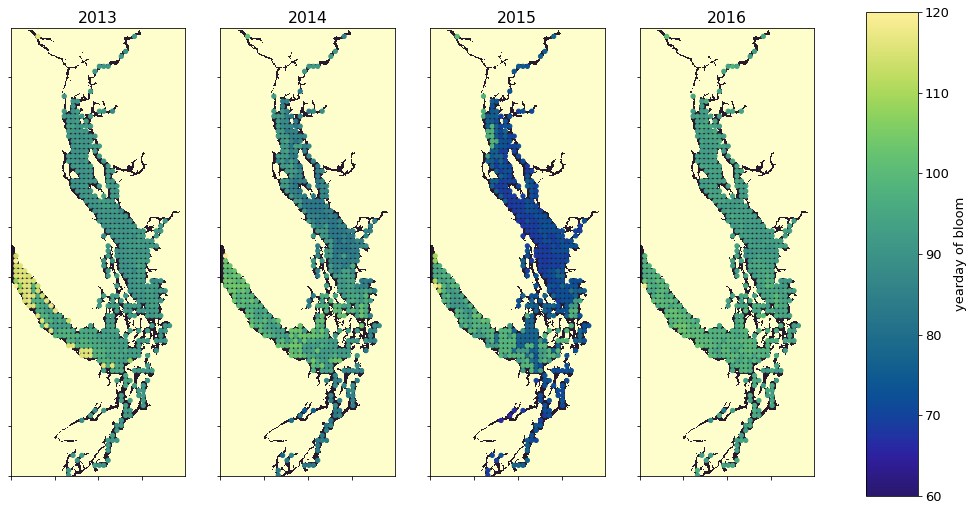

In [31]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}


fact = 1.2
fig = plt.figure(figsize=(12*fact, 7*fact))


bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
# tpkl = f'./pkls/{var}_clustmat_{year}.pkl'
# cl = pickle.load(open(tpkl, 'rb'))

  
fmask = (grid.fmask[0,0,:,:])    


bts = [bloomtim0pt3_2013,bloomtim0pt3_2014,bloomtim0pt3_2015,bloomtim0pt3_2016]
tits = ['2013', '2014', '2015', '2016']
for i in range(0,4):
    ax1 = plt.subplot2grid((4,4), (0,i), colspan=1, rowspan=4) 
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)

    ax1.set_ylim([0,898]); ax1.set_xlim([0,398])
    pts = ax1.scatter(d_stn_xar_noedge,d_stn_yar_noedge,s=18,\
                      c=bts[i], vmin = 60, vmax = 120, marker='o',\
                     cmap = cm.cm.haline)
    viz_tools.set_aspect(ax1) 
    ax1.set_xticklabels( () ) 
    ax1.set_yticklabels( () )
    ax1.set_title(tits[i])

cbar_ax = fig.add_axes([0.95, 0.1, 0.05, 0.8])
fig.colorbar(pts, cax=cbar_ax, label = 'yearday of bloom')
#plt.suptitle('Initiation of the ')

plt.savefig('30pct.jpg')

# plt.colorbar(pts)

#tit = 'year ' + year # + ' \n n. clusters = '+ str(noclust)

# if legend:
#     ax1.legend(bbox_to_anchor=(1.06, 1), fontsize = legfontsize)
#ax1.set_title(tit,fontsize = legfontsize + 2)

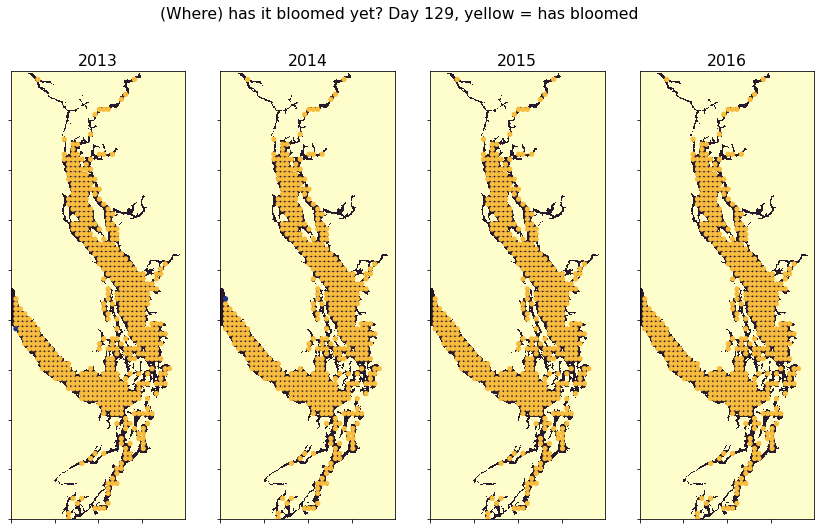

In [16]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}


fact = 1.2
fig = plt.figure(figsize=(12*fact, 7*fact))


bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
# tpkl = f'./pkls/{var}_clustmat_{year}.pkl'
# cl = pickle.load(open(tpkl, 'rb'))
fmask = (grid.fmask[0,0,:,:])    

for d in range(60,130):
    
    bts = [bloomtim0pt3_2013,bloomtim0pt3_2014,bloomtim0pt3_2015,bloomtim0pt3_2016]
    tits = ['2013', '2014', '2015', '2016']
    
    
    for i in range(0,4):
        
        tb = np.copy(bts[i])
        tb[tb<d]=0
        tb[tb>=d]=1
        
        ax1 = plt.subplot2grid((4,4), (0,i), colspan=1, rowspan=4) 
        mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)

        ax1.set_ylim([0,898]); ax1.set_xlim([0,398])
        pts = ax1.scatter(d_stn_xar_noedge,d_stn_yar_noedge,s=18,\
                          c=tb, vmin = -0.2, vmax = 1.2, marker='o',\
                         cmap = cm.cm.thermal_r)
        viz_tools.set_aspect(ax1) 
        ax1.set_xticklabels( () ) 
        ax1.set_yticklabels( () )
        ax1.set_title(tits[i])

    #cbar_ax = fig.add_axes([0.95, 0.1, 0.05, 0.8])
    #fig.colorbar(pts, cax=cbar_ax, label = 'yearday of bloom')
    plt.suptitle(f'(Where) has it bloomed yet? Day {d}, yellow = has bloomed')

    if d<100:
        dstr = f'0{d}'
    else:
        dstr =f'{d}'
    tit = f'./blomtim/Bloomatday_{d}.jpg'
    plt.savefig(tit)

# plt.colorbar(pts)

#tit = 'year ' + year # + ' \n n. clusters = '+ str(noclust)

# if legend:
#     ax1.legend(bbox_to_anchor=(1.06, 1), fontsize = legfontsize)
#ax1.set_title(tit,fontsize = legfontsize + 2)

Text(0.5, 1.0, 'quick display of spread of bloom timing')

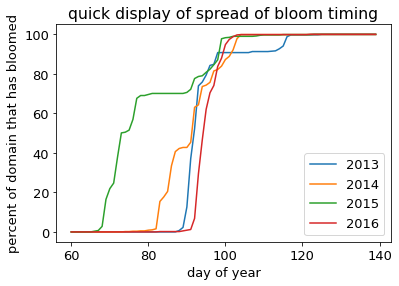

In [17]:
percbloom_2013 = np.zeros(80)
percbloom_2014 = np.zeros(80)
percbloom_2015 = np.zeros(80)
percbloom_2016 = np.zeros(80)


bts = [bloomtim0pt3_2013,bloomtim0pt3_2014,bloomtim0pt3_2015,bloomtim0pt3_2016]
tits = ['2013', '2014', '2015', '2016']
    
 
for d in range(60,140):
    percbloom_2013[d-60] = np.size(bloomtim0pt3_2013[bloomtim0pt3_2013<=d])/np.size(bloomtim0pt3_2013)
    percbloom_2014[d-60] = np.size(bloomtim0pt3_2014[bloomtim0pt3_2014<=d])/np.size(bloomtim0pt3_2014)
    percbloom_2015[d-60] = np.size(bloomtim0pt3_2015[bloomtim0pt3_2015<=d])/np.size(bloomtim0pt3_2015)
    percbloom_2016[d-60] = np.size(bloomtim0pt3_2016[bloomtim0pt3_2016<=d])/np.size(bloomtim0pt3_2016)

    
plt.plot(np.arange(60,140,1),percbloom_2013*100, label = '2013')
plt.plot(np.arange(60,140,1),percbloom_2014*100, label = '2014')
plt.plot(np.arange(60,140,1),percbloom_2015*100, label = '2015')
plt.plot(np.arange(60,140,1),percbloom_2016*100, label = '2016')
plt.legend(loc = 'best')

plt.ylabel('percent of domain that has bloomed')
plt.xlabel('day of year')
plt.title('quick display of spread of bloom timing')

In [18]:
percbloom_2016[35]

0.6199649737302977

## looking at spread in timing in a given year

Text(0.5, 1.05, 'Bloom timing. Bloom definition: first peak of depth-integrated DIATOM biomass \n that is at least 1/2 of annual maximum')

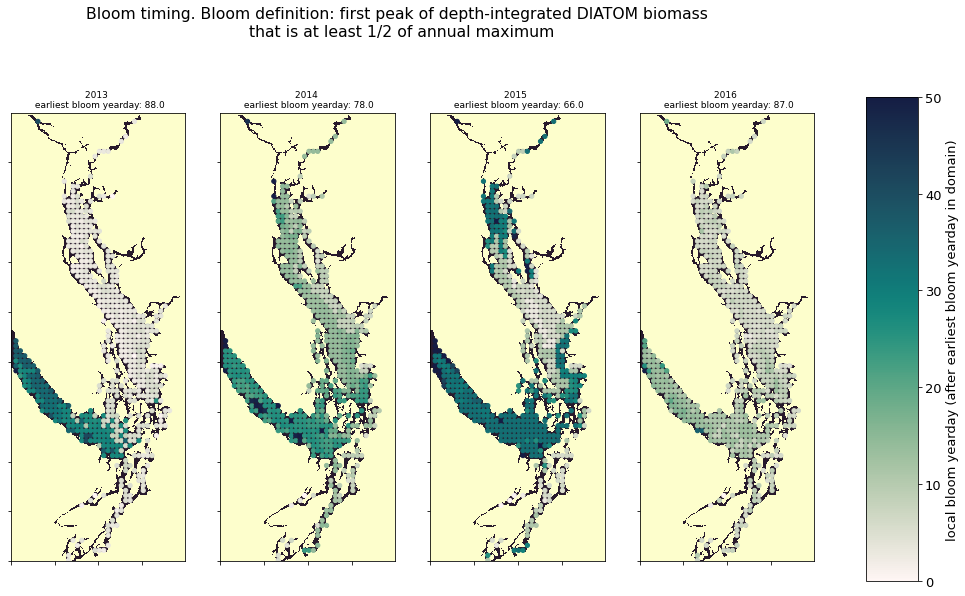

In [19]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}


fact = 1.2
fig = plt.figure(figsize=(12*fact, 7*fact))


bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
# tpkl = f'./pkls/{var}_clustmat_{year}.pkl'
# cl = pickle.load(open(tpkl, 'rb'))

  
fmask = (grid.fmask[0,0,:,:])    


bts = [bloomtim_2013,bloomtim_2014,bloomtim_2015,bloomtim_2016]
tits = ['2013', '2014', '2015', '2016']
for i in range(0,4):
    ax1 = plt.subplot2grid((4,4), (0,i), colspan=1, rowspan=4) 
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)

    ax1.set_ylim([0,898]); ax1.set_xlim([0,398])
    pts = ax1.scatter(d_stn_xar_noedge,d_stn_yar_noedge,s=18,\
                      c=bts[i]-np.nanmin(bts[i]), vmin = 0, vmax = 50, marker='o',\
                     cmap = cm.cm.tempo)
    viz_tools.set_aspect(ax1) 
    ax1.set_xticklabels( () ) 
    ax1.set_yticklabels( () )
    ax1.set_title(f'{tits[i]} \n earliest bloom yearday: {np.nanmin(bts[i])}', fontsize = 9)

cbar_ax = fig.add_axes([0.95, 0.1, 0.05, 0.8])
fig.colorbar(pts, cax=cbar_ax, label = 'local bloom yearday (after earliest bloom yearday in domain)')
plt.suptitle('Bloom timing. Bloom definition: first peak of depth-integrated DIATOM biomass \n that is at least 1/2 of annual maximum', y = 1.05)



# plt.colorbar(pts)

#tit = 'year ' + year # + ' \n n. clusters = '+ str(noclust)

# if legend:
#     ax1.legend(bbox_to_anchor=(1.06, 1), fontsize = legfontsize)
#ax1.set_title(tit,fontsize = legfontsize + 2)

Text(0.5, 1.05, 'Bloom timing. Bloom definition: first peak of depth-integrated DIATOM biomass \n that is at least 30% of annual maximum')

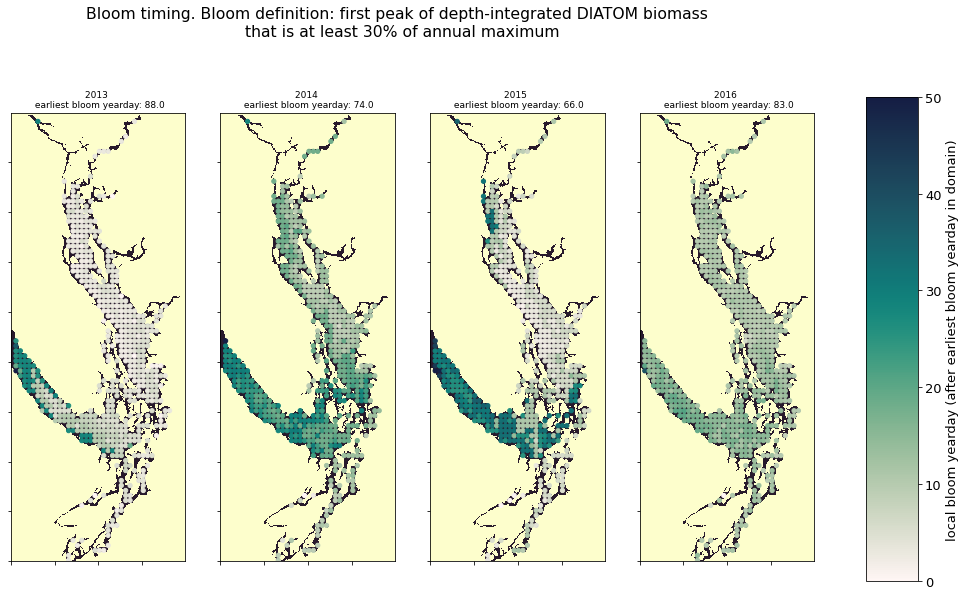

In [20]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}


fact = 1.2
fig = plt.figure(figsize=(12*fact, 7*fact))


bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
# tpkl = f'./pkls/{var}_clustmat_{year}.pkl'
# cl = pickle.load(open(tpkl, 'rb'))

  
fmask = (grid.fmask[0,0,:,:])    


bts = [bloomtim0pt3_2013,bloomtim0pt3_2014,bloomtim0pt3_2015,bloomtim0pt3_2016]
tits = ['2013', '2014', '2015', '2016']
for i in range(0,4):
    ax1 = plt.subplot2grid((4,4), (0,i), colspan=1, rowspan=4) 
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)

    ax1.set_ylim([0,898]); ax1.set_xlim([0,398])
    pts = ax1.scatter(d_stn_xar_noedge,d_stn_yar_noedge,s=18,\
                      c=bts[i]-np.nanmin(bts[i]), vmin = 0, vmax = 50, marker='o',\
                     cmap = cm.cm.tempo)
    viz_tools.set_aspect(ax1) 
    ax1.set_xticklabels( () ) 
    ax1.set_yticklabels( () )
    ax1.set_title(f'{tits[i]} \n earliest bloom yearday: {np.nanmin(bts[i])}', fontsize = 9)

cbar_ax = fig.add_axes([0.95, 0.1, 0.05, 0.8])
fig.colorbar(pts, cax=cbar_ax, label = 'local bloom yearday (after earliest bloom yearday in domain)')
plt.suptitle('Bloom timing. Bloom definition: first peak of depth-integrated DIATOM biomass \n that is at least 30% of annual maximum', y = 1.05)



# plt.colorbar(pts)

#tit = 'year ' + year # + ' \n n. clusters = '+ str(noclust)

# if legend:
#     ax1.legend(bbox_to_anchor=(1.06, 1), fontsize = legfontsize)
#ax1.set_title(tit,fontsize = legfontsize + 2)

In [21]:
CS2013_mean = np.nanmean(bloomtim_2013[cldes_2013_reass ==3])
CS2013_std = np.nanstd(bloomtim_2013[cldes_2013_reass ==3])
CS2013_min = np.nanmin(bloomtim_2013[cldes_2013_reass ==3])
CS2013_max = np.nanmax(bloomtim_2013[cldes_2013_reass ==3])
CS2014_mean = np.nanmean(bloomtim_2014[cldes_2014_reass ==3])
CS2014_std = np.nanstd(bloomtim_2014[cldes_2014_reass ==3])
CS2014_min = np.nanmin(bloomtim_2014[cldes_2014_reass ==3])
CS2014_max = np.nanmax(bloomtim_2014[cldes_2014_reass ==3])
CS2015_mean = np.nanmean(bloomtim_2015[cldes_2015_reass ==3])
CS2015_std = np.nanstd(bloomtim_2015[cldes_2015_reass ==3])
CS2015_min = np.nanmin(bloomtim_2015[cldes_2015_reass ==3])
CS2015_max = np.nanmax(bloomtim_2015[cldes_2015_reass ==3])
CS2016_mean = np.nanmean(bloomtim_2016[cldes_2016_reass ==3])
CS2016_std = np.nanstd(bloomtim_2016[cldes_2016_reass ==3])
CS2016_min = np.nanmin(bloomtim_2016[cldes_2016_reass ==3])
CS2016_max = np.nanmax(bloomtim_2016[cldes_2016_reass ==3])

SN2013_mean = np.nanmean(bloomtim_2013[cldes_2013_reass ==4])
SN2013_std = np.nanstd(bloomtim_2013[cldes_2013_reass ==4])
SN2013_min = np.nanmin(bloomtim_2013[cldes_2013_reass ==4])
SN2013_max = np.nanmax(bloomtim_2013[cldes_2013_reass ==4])
SN2014_mean = np.nanmean(bloomtim_2014[cldes_2014_reass ==4])
SN2014_std = np.nanstd(bloomtim_2014[cldes_2014_reass ==4])
SN2014_min = np.nanmin(bloomtim_2014[cldes_2014_reass ==4])
SN2014_max = np.nanmax(bloomtim_2014[cldes_2014_reass ==4])
SN2015_mean = np.nanmean(bloomtim_2015[cldes_2015_reass ==4])
SN2015_std = np.nanstd(bloomtim_2015[cldes_2015_reass ==4])
SN2015_min = np.nanmin(bloomtim_2015[cldes_2015_reass ==4])
SN2015_max = np.nanmax(bloomtim_2015[cldes_2015_reass ==4])
SN2016_mean = np.nanmean(bloomtim_2016[cldes_2016_reass ==4])
SN2016_std = np.nanstd(bloomtim_2016[cldes_2016_reass ==4])
SN2016_min = np.nanmin(bloomtim_2016[cldes_2016_reass ==4])
SN2016_max = np.nanmax(bloomtim_2016[cldes_2016_reass ==4])

JDF2013_mean = np.nanmean(bloomtim_2013[cldes_2013_reass ==5])
JDF2013_std = np.nanstd(bloomtim_2013[cldes_2013_reass ==5])
JDF2013_min = np.nanmin(bloomtim_2013[cldes_2013_reass ==5])
JDF2013_max = np.nanmax(bloomtim_2013[cldes_2013_reass ==5])
JDF2014_mean = np.nanmean(bloomtim_2014[cldes_2014_reass ==5])
JDF2014_std = np.nanstd(bloomtim_2014[cldes_2014_reass ==5])
JDF2014_min = np.nanmin(bloomtim_2014[cldes_2014_reass ==5])
JDF2014_max = np.nanmax(bloomtim_2014[cldes_2014_reass ==5])
JDF2015_mean = np.nanmean(bloomtim_2015[cldes_2015_reass ==5])
JDF2015_std = np.nanstd(bloomtim_2015[cldes_2015_reass ==5])
JDF2015_min = np.nanmin(bloomtim_2015[cldes_2015_reass ==5])
JDF2015_max = np.nanmax(bloomtim_2015[cldes_2015_reass ==5])
JDF2016_mean = np.nanmean(bloomtim_2016[cldes_2016_reass ==5])
JDF2016_std = np.nanstd(bloomtim_2016[cldes_2016_reass ==5])
JDF2016_min = np.nanmin(bloomtim_2016[cldes_2016_reass ==5])
JDF2016_max = np.nanmax(bloomtim_2016[cldes_2016_reass ==5])

In [22]:
CS2013_mean0pt3 = np.nanmean(bloomtim0pt3_2013[cldes_2013_reass ==3])
CS2013_std0pt3 = np.nanstd(bloomtim0pt3_2013[cldes_2013_reass ==3])
CS2013_min0pt3 = np.nanmin(bloomtim0pt3_2013[cldes_2013_reass ==3])
CS2013_max0pt3 = np.nanmax(bloomtim0pt3_2013[cldes_2013_reass ==3])
CS2014_mean0pt3 = np.nanmean(bloomtim0pt3_2014[cldes_2014_reass ==3])
CS2014_std0pt3 = np.nanstd(bloomtim0pt3_2014[cldes_2014_reass ==3])
CS2014_min0pt3 = np.nanmin(bloomtim0pt3_2014[cldes_2014_reass ==3])
CS2014_max0pt3 = np.nanmax(bloomtim0pt3_2014[cldes_2014_reass ==3])
CS2015_mean0pt3 = np.nanmean(bloomtim0pt3_2015[cldes_2015_reass ==3])
CS2015_std0pt3 = np.nanstd(bloomtim0pt3_2015[cldes_2015_reass ==3])
CS2015_min0pt3 = np.nanmin(bloomtim0pt3_2015[cldes_2015_reass ==3])
CS2015_max0pt3 = np.nanmax(bloomtim0pt3_2015[cldes_2015_reass ==3])
CS2016_mean0pt3 = np.nanmean(bloomtim0pt3_2016[cldes_2016_reass ==3])
CS2016_std0pt3 = np.nanstd(bloomtim0pt3_2016[cldes_2016_reass ==3])
CS2016_min0pt3 = np.nanmin(bloomtim0pt3_2016[cldes_2016_reass ==3])
CS2016_max0pt3 = np.nanmax(bloomtim0pt3_2016[cldes_2016_reass ==3])

SN2013_mean0pt3 = np.nanmean(bloomtim0pt3_2013[cldes_2013_reass ==4])
SN2013_std0pt3 = np.nanstd(bloomtim0pt3_2013[cldes_2013_reass ==4])
SN2013_min0pt3 = np.nanmin(bloomtim0pt3_2013[cldes_2013_reass ==4])
SN2013_max0pt3 = np.nanmax(bloomtim0pt3_2013[cldes_2013_reass ==4])
SN2014_mean0pt3 = np.nanmean(bloomtim0pt3_2014[cldes_2014_reass ==4])
SN2014_std0pt3 = np.nanstd(bloomtim0pt3_2014[cldes_2014_reass ==4])
SN2014_min0pt3 = np.nanmin(bloomtim0pt3_2014[cldes_2014_reass ==4])
SN2014_max0pt3 = np.nanmax(bloomtim0pt3_2014[cldes_2014_reass ==4])
SN2015_mean0pt3 = np.nanmean(bloomtim0pt3_2015[cldes_2015_reass ==4])
SN2015_std0pt3 = np.nanstd(bloomtim0pt3_2015[cldes_2015_reass ==4])
SN2015_min0pt3 = np.nanmin(bloomtim0pt3_2015[cldes_2015_reass ==4])
SN2015_max0pt3 = np.nanmax(bloomtim0pt3_2015[cldes_2015_reass ==4])
SN2016_mean0pt3 = np.nanmean(bloomtim0pt3_2016[cldes_2016_reass ==4])
SN2016_std0pt3 = np.nanstd(bloomtim0pt3_2016[cldes_2016_reass ==4])
SN2016_min0pt3 = np.nanmin(bloomtim0pt3_2016[cldes_2016_reass ==4])
SN2016_max0pt3 = np.nanmax(bloomtim0pt3_2016[cldes_2016_reass ==4])

JDF2013_mean0pt3 = np.nanmean(bloomtim0pt3_2013[cldes_2013_reass ==5])
JDF2013_std0pt3 = np.nanstd(bloomtim0pt3_2013[cldes_2013_reass ==5])
JDF2013_min0pt3 = np.nanmin(bloomtim0pt3_2013[cldes_2013_reass ==5])
JDF2013_max0pt3 = np.nanmax(bloomtim0pt3_2013[cldes_2013_reass ==5])
JDF2014_mean0pt3 = np.nanmean(bloomtim0pt3_2014[cldes_2014_reass ==5])
JDF2014_std0pt3 = np.nanstd(bloomtim0pt3_2014[cldes_2014_reass ==5])
JDF2014_min0pt3 = np.nanmin(bloomtim0pt3_2014[cldes_2014_reass ==5])
JDF2014_max0pt3 = np.nanmax(bloomtim0pt3_2014[cldes_2014_reass ==5])
JDF2015_mean0pt3 = np.nanmean(bloomtim0pt3_2015[cldes_2015_reass ==5])
JDF2015_std0pt3 = np.nanstd(bloomtim0pt3_2015[cldes_2015_reass ==5])
JDF2015_min0pt3 = np.nanmin(bloomtim0pt3_2015[cldes_2015_reass ==5])
JDF2015_max0pt3 = np.nanmax(bloomtim0pt3_2015[cldes_2015_reass ==5])
JDF2016_mean0pt3 = np.nanmean(bloomtim0pt3_2016[cldes_2016_reass ==5])
JDF2016_std0pt3 = np.nanstd(bloomtim0pt3_2016[cldes_2016_reass ==5])
JDF2016_min0pt3 = np.nanmin(bloomtim0pt3_2016[cldes_2016_reass ==5])
JDF2016_max0pt3 = np.nanmax(bloomtim0pt3_2016[cldes_2016_reass ==5])

Text(0.5, 1.0, 'Bloom timing - bloom threshold is first diatom peak > 30% of max. diatom biomass')

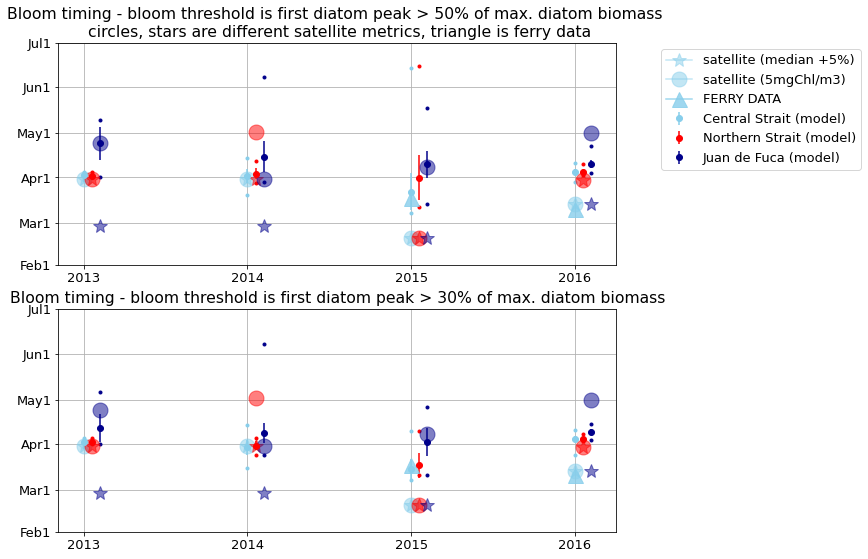

In [23]:
fact = 0.5
fig, axs = plt.subplots(2,1, figsize=(20*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

CS_means = [CS2013_mean,CS2014_mean,CS2015_mean,CS2016_mean]
CS_stds = [CS2013_std,CS2014_std,CS2015_std,CS2016_std]
CS_mins = [CS2013_min,CS2014_min,CS2015_min,CS2016_min]
CS_maxs = [CS2013_max,CS2014_max,CS2015_max,CS2016_max]
CS_mean_5pc = [89, 89, 49 ,72]
CS_mean_5mg = [89, 89, 49 ,72]

SN_means = [SN2013_mean,SN2014_mean,SN2015_mean,SN2016_mean]
SN_stds = [SN2013_std,SN2014_std,SN2015_std,SN2016_std]
SN_mins = [SN2013_min,SN2014_min,SN2015_min,SN2016_min]
SN_maxs = [SN2013_max,SN2014_max,SN2015_max,SN2016_max]

JDF_means = [JDF2013_mean,JDF2014_mean,JDF2015_mean,JDF2016_mean]
JDF_stds = [JDF2013_std,JDF2014_std,JDF2015_std,JDF2016_std]
JDF_mins = [JDF2013_min,JDF2014_min,JDF2015_min,JDF2016_min]
JDF_maxs = [JDF2013_max,JDF2014_max,JDF2015_max,JDF2016_max]

SN_mean_5pc = [89, 89, 49 ,88]
SN_mean_5mg = [89, 121, 49 ,88]

JDF_mean_5pc = [57, 57, 49 ,72]
JDF_mean_5mg = [113, 89, 97 ,120]

for yr in range(2013,2014):
    axs[0].errorbar(yr, CS_means[yr-2013], yerr=CS_stds[yr-2013], color='skyblue', fmt='o', label = 'Central Strait (model)')
    axs[0].plot(yr, CS_mins[yr-2013], color='skyblue', marker = '.')
    axs[0].plot(yr, CS_maxs[yr-2013], color='skyblue', marker = '.')

    
    axs[0].errorbar(yr+0.05, SN_means[yr-2013], yerr=SN_stds[yr-2013], color='red', fmt='o',  label = 'Northern Strait (model)')
    axs[0].plot(yr+0.05, SN_mins[yr-2013], color='red', marker = '.')
    axs[0].plot(yr+0.05, SN_maxs[yr-2013], color='red', marker = '.')

    
    axs[0].errorbar(yr+0.1, JDF_means[yr-2013], yerr=JDF_stds[yr-2013], color='darkblue', fmt='o', label = 'Juan de Fuca (model)')
    axs[0].plot(yr+0.1, JDF_mins[yr-2013], color='darkblue', marker = '.')
    axs[0].plot(yr+0.1, JDF_maxs[yr-2013], color='darkblue', marker = '.')

    axs[0].plot(yr, CS_mean_5pc[yr-2013], color='skyblue', marker = '*', \
                markersize = 15, alpha = 0.5, label = 'satellite (median +5%)')
    axs[0].plot(yr, CS_mean_5mg[yr-2013], color='skyblue', marker = 'o',\
                markersize = 15, alpha = 0.5, label = 'satellite (5mgChl/m3)')
    axs[0].plot(yr+0.05, SN_mean_5pc[yr-2013], color='red', marker = '*', \
                markersize = 15, alpha = 0.5)
    axs[0].plot(yr+0.05, SN_mean_5mg[yr-2013], color='red', marker = 'o',\
                markersize = 15, alpha = 0.5)
    axs[0].plot(yr+0.1, JDF_mean_5pc[yr-2013], color='darkblue', marker = '*', \
                markersize = 15, alpha = 0.5)
    axs[0].plot(yr+0.1, JDF_mean_5mg[yr-2013], color='darkblue', marker = 'o',\
                markersize = 15, alpha = 0.5)
        
for yr in range(2014,2017):
    axs[0].errorbar(yr, CS_means[yr-2013], yerr=CS_stds[yr-2013], color='skyblue', fmt='o')
    axs[0].plot(yr, CS_mins[yr-2013], color='skyblue', marker = '.')
    axs[0].plot(yr, CS_maxs[yr-2013], color='skyblue', marker = '.')
    
    axs[0].errorbar(yr+0.05, SN_means[yr-2013], yerr=SN_stds[yr-2013], color='red', fmt='o')
    axs[0].plot(yr+0.05, SN_mins[yr-2013], color='red', marker = '.')
    axs[0].plot(yr+0.05, SN_maxs[yr-2013], color='red', marker = '.')

    
    axs[0].errorbar(yr+0.1, JDF_means[yr-2013], yerr=JDF_stds[yr-2013], color='darkblue', fmt='o')
    axs[0].plot(yr+0.1, JDF_mins[yr-2013], color='darkblue', marker = '.')
    axs[0].plot(yr+0.1, JDF_maxs[yr-2013], color='darkblue', marker = '.')
    
    
    axs[0].plot(yr, CS_mean_5pc[yr-2013], color='skyblue', marker = '*', \
                markersize = 15, alpha = 0.5)
    axs[0].plot(yr, CS_mean_5mg[yr-2013], color='skyblue', marker = 'o',\
                markersize = 15, alpha = 0.5)
    axs[0].plot(yr+0.05, SN_mean_5pc[yr-2013], color='red', marker = '*', \
                markersize = 15, alpha = 0.5)
    axs[0].plot(yr+0.05, SN_mean_5mg[yr-2013], color='red', marker = 'o',\
                markersize = 15, alpha = 0.5)
    axs[0].plot(yr+0.1, JDF_mean_5pc[yr-2013], color='darkblue', marker = '*', \
                markersize = 15, alpha = 0.5)
    axs[0].plot(yr+0.1, JDF_mean_5mg[yr-2013], color='darkblue', marker = 'o',\
                markersize = 15, alpha = 0.5)
    
CS_mean0pt3s = [CS2013_mean0pt3,CS2014_mean0pt3,CS2015_mean0pt3,CS2016_mean0pt3]
CS_std0pt3s = [CS2013_std0pt3,CS2014_std0pt3,CS2015_std0pt3,CS2016_std0pt3]
CS_min0pt3s = [CS2013_min0pt3,CS2014_min0pt3,CS2015_min0pt3,CS2016_min0pt3]
CS_max0pt3s = [CS2013_max0pt3,CS2014_max0pt3,CS2015_max0pt3,CS2016_max0pt3]

SN_mean0pt3s = [SN2013_mean0pt3,SN2014_mean0pt3,SN2015_mean0pt3,SN2016_mean0pt3]
SN_std0pt3s = [SN2013_std0pt3,SN2014_std0pt3,SN2015_std0pt3,SN2016_std0pt3]
SN_min0pt3s = [SN2013_min0pt3,SN2014_min0pt3,SN2015_min0pt3,SN2016_min0pt3]
SN_max0pt3s = [SN2013_max0pt3,SN2014_max0pt3,SN2015_max0pt3,SN2016_max0pt3]

JDF_mean0pt3s = [JDF2013_mean0pt3,JDF2014_mean0pt3,JDF2015_mean0pt3,JDF2016_mean0pt3]
JDF_std0pt3s = [JDF2013_std0pt3,JDF2014_std0pt3,JDF2015_std0pt3,JDF2016_std0pt3]
JDF_min0pt3s = [JDF2013_min0pt3,JDF2014_min0pt3,JDF2015_min0pt3,JDF2016_min0pt3]
JDF_max0pt3s = [JDF2013_max0pt3,JDF2014_max0pt3,JDF2015_max0pt3,JDF2016_max0pt3]


for yr in range(2013,2017):
    axs[1].errorbar(yr, CS_mean0pt3s[yr-2013], yerr=CS_std0pt3s[yr-2013], color='skyblue', fmt='o', label = 'Central Strait')
    axs[1].plot(yr, CS_min0pt3s[yr-2013], color='skyblue', marker = '.')
    axs[1].plot(yr, CS_max0pt3s[yr-2013], color='skyblue', marker = '.')
    
    axs[1].errorbar(yr+0.05, SN_mean0pt3s[yr-2013], yerr=SN_std0pt3s[yr-2013], color='red', fmt='o',  label = 'Northern Strait')
    axs[1].plot(yr+0.05, SN_min0pt3s[yr-2013], color='red', marker = '.')
    axs[1].plot(yr+0.05, SN_max0pt3s[yr-2013], color='red', marker = '.')
    
    axs[1].errorbar(yr+0.1, JDF_mean0pt3s[yr-2013], yerr=JDF_std0pt3s[yr-2013], color='darkblue', fmt='o', label = 'Juan de Fuca')
    axs[1].plot(yr+0.1, JDF_min0pt3s[yr-2013], color='darkblue', marker = '.')
    axs[1].plot(yr+0.1, JDF_max0pt3s[yr-2013], color='darkblue', marker = '.')
    
    axs[1].plot(yr, CS_mean_5pc[yr-2013], color='skyblue', marker = '*', \
                markersize = 15, alpha = 0.5)
    axs[1].plot(yr, CS_mean_5mg[yr-2013], color='skyblue', marker = 'o',\
                markersize = 15, alpha = 0.5)
    axs[1].plot(yr+0.05, SN_mean_5pc[yr-2013], color='red', marker = '*', \
                markersize = 15, alpha = 0.5)
    axs[1].plot(yr+0.05, SN_mean_5mg[yr-2013], color='red', marker = 'o',\
                markersize = 15, alpha = 0.5)
    axs[1].plot(yr+0.1, JDF_mean_5pc[yr-2013], color='darkblue', marker = '*', \
                markersize = 15, alpha = 0.5)
    axs[1].plot(yr+0.1, JDF_mean_5mg[yr-2013], color='darkblue', marker = 'o',\
                markersize = 15, alpha = 0.5)

##ferry BCferrys
axs[1].plot(2015, 76, color='skyblue', marker = '^', \
            markersize = 15, alpha = 0.8, label = 'FERRY DATA')    
axs[1].plot(2016, 69, color='skyblue', marker = '^', \
            markersize = 15, alpha = 0.8)    
axs[0].plot(2015, 76, color='skyblue', marker = '^', \
            markersize = 15, alpha = 0.8, label = 'FERRY DATA')    
axs[0].plot(2016, 69, color='skyblue', marker = '^', \
            markersize = 15, alpha = 0.8)    
    
for i in range(0,2):
    axs[i].set_xticks([2013,2014,2015,2016])
    axs[i].set_yticks([31,59,90,120,151,181])
    axs[i].set_yticklabels(['Feb1','Mar1','Apr1','May1','Jun1','Jul1'])
    axs[i].grid()
    
    
    
axs[0].legend(bbox_to_anchor = [1.45,1])
axs[0].set_title('Bloom timing - bloom threshold is first diatom peak > 50% of max. diatom biomass \n circles, stars are different satellite metrics, triangle is ferry data' )
axs[1].set_title('Bloom timing - bloom threshold is first diatom peak > 30% of max. diatom biomass')